In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as tsm
from astsadata import *

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [2]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

# Section 3.3 Autocorrelation and Partial Autocorrelation

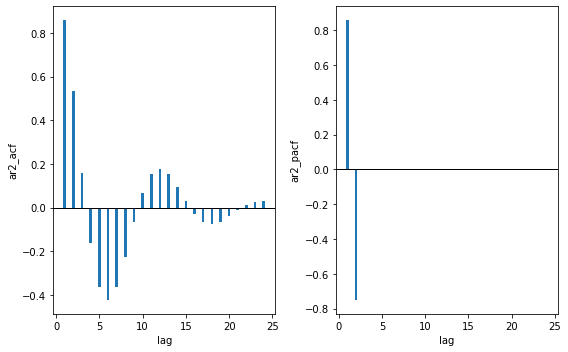

In [3]:
# Example 3.16
ar2_acf = tsm.arima_process.arma_acf(ar=[1, -1.5, .75], ma=[1, 0], lags=25)[1:]
ar2_pacf = tsm.arima_process.arma_pacf(ar=[1, -1.5, .75], ma=[1, 0], lags=25)[1:]
lags = np.arange(1, 25)

fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
axes[0].bar(lags, ar2_acf, width=.3)
axes[0].axhline(0, color="black", linewidth=1)
axes[0].set_xlabel("lag")
axes[0].set_ylabel("ar2_acf")

axes[1].bar(lags, ar2_pacf, width=.3)
axes[1].axhline(0, color="black", linewidth=1)
axes[1].set_xlabel("lag")
axes[1].set_ylabel("ar2_pacf")

fig.tight_layout()
plt.show()

In [4]:
# Example 3.18
print(sm.tsa.acf(rec, nlags=48, fft=False)[1:], "\n")
print(sm.tsa.pacf(rec, nlags=48)[1:])

[ 0.92180421  0.78291817  0.62699624  0.47734917  0.35543191  0.25928198
  0.1824141   0.126923    0.09365357  0.07410671  0.05711484  0.0239486
 -0.03710841 -0.11579969 -0.1877115  -0.23996874 -0.2668297  -0.26777909
 -0.2412331  -0.18507433 -0.1097977  -0.0334266   0.03031228  0.06428622
  0.05662246  0.02101004 -0.01831943 -0.0585743  -0.09314434 -0.11844084
 -0.12504868 -0.10636648 -0.05417787  0.01962291  0.08477073  0.11615412
  0.10277312  0.05791282  0.0096687  -0.01966107 -0.03336518 -0.0331922
 -0.02047722  0.01143469  0.05929651  0.11710424  0.1743476   0.20495483] 

[ 0.9238436  -0.45795879 -0.04275725 -0.01592385  0.07715979 -0.03326433
 -0.03220548  0.03921676  0.05028842 -0.02102956 -0.0585199  -0.1485316
 -0.15525155 -0.05387466  0.05889749  0.00949503  0.0057794   0.02564797
  0.0952969   0.11788724  0.0284908  -0.03251751 -0.00856125 -0.07383949
 -0.13183565 -0.03238931  0.05172264 -0.09371912 -0.04471695 -0.03044726
  0.07252379  0.05531913  0.16682644  0.1050421  -0

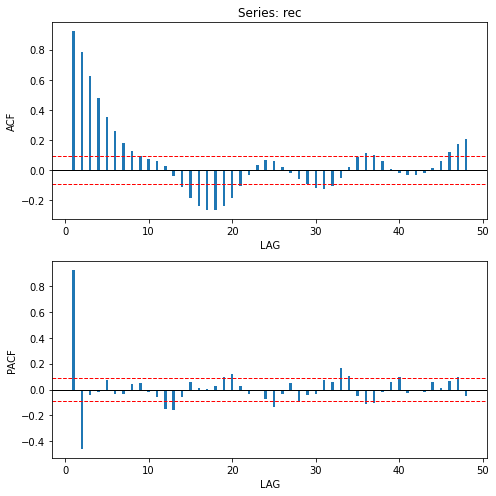

In [5]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 7))

acf1(rec, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Series: rec")

acf1(rec, nlags=48, pacf=True, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

In [6]:
regr = sm.tsa.AutoReg(rec, lags=2).fit()
print(regr.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  453
Model:                     AutoReg(2)   Log Likelihood               -1653.938
Method:               Conditional MLE   S.D. of innovations              9.472
Date:                Tue, 18 May 2021   AIC                              4.514
Time:                        12:26:17   BIC                              4.551
Sample:                    03-31-1950   HQIC                             4.529
                         - 09-30-1987                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7371      1.111      6.066      0.000       4.560       8.914
value.L1       1.3541      0.042     32.403      0.000       1.272       1.436
value.L2      -0.4632      0.042    -11.060      0.0

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
